<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%tensorflow_version 2.x
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

Normal distribution
Uniform distribution
You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters mu and sigma in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.


In [0]:
np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
  # labels 1 and 0 with probability of 1/2
  c = [0 if np.random.rand(1) < .5 else 1 for x in range(m)]

  # creating a new list for (-1)^c
  alt_c = [(-1)**i for i in c]
  noise = np.multiply(alt_c, np.random.normal(loc=mu, scale=sigma, size=m)) 
  
  # uniform distribution [0, 1)
  x_1 = np.random.uniform(low=0, high=1, size=m)

  listy = np.multiply(w, x_1)
  x_2 = np.add(listy, noise)
  
  # create an array for the colors for each class
  
  return x_1, x_2, c

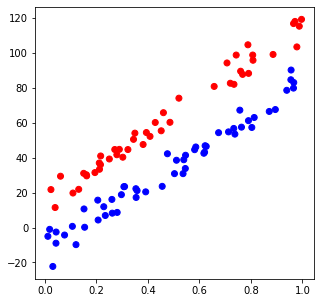

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f47b553e908>)

In [25]:
def graph_random_data(w, b, mu, sigma, m):
  x_1, x_2, c = get_random_data(w, b, mu, sigma, m)
  fig, ax = plt.subplots(figsize=(5,5))

  colors = ['blue' if c[x] == 1 else 'red' for x in range(m)]

  ax.scatter(x_1, x_2, c=colors)
  plt.show()
  return fig, ax

graph_random_data(100,10,15,5,100)

**Problem 2**

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss. 

How well does the trained model separate the red and blue dots?  You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function ```get_weights```. See [https://keras.io/layers/about-keras-layers/](https://keras.io/layers/about-keras-layers/).  

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer).  This is not immediately obvious.  It maybe helpful to take a look at the heatmap below.

The trained model realizes function ```f : R^2 -> R``` that takes two features as input and outputs a number in the interval ```[0, 1]```. Use a heatmap to visualize this function.  

---

In [0]:
# get data and test train split
x_1, x_2, y = get_random_data(100,10,15,5,100)

# X = (x1, x2 ... xn)T
X = np.array([x_1, x_2]).T

y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [0]:
def build_model(input_dim, output_dim):
  model = keras.Sequential()
  model.add(tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

  return model



In [83]:
# number of inputs
input_dim = 2
# output dimensions (classes)
output_dim = 1
model = build_model(input_dim, output_dim)

EPOCHS = 300

history = model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/300
3/3 [==============================] - 0s 2ms/step - loss: 13.9737
Epoch 2/300
3/3 [==============================] - 0s 2ms/step - loss: 8.8620
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: 6.5962
Epoch 4/300
3/3 [==============================] - 0s 2ms/step - loss: 2.7412
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: 1.4899
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 1.5182
Epoch 7/300
3/3 [==============================] - 0s 1ms/step - loss: 0.5855
Epoch 8/300
3/3 [==============================] - 0s 1ms/step - loss: 1.3508
Epoch 9/300
3/3 [==============================] - 0s 2ms/step - loss: 1.5185
Epoch 10/300
3/3 [==============================] - 0s 1ms/step - loss: 0.7584
Epoch 11/300
3/3 [==============================] - 0s 2ms/step - loss: 0.5018
Epoch 12/300
3/3 [==============================] - 0s 2ms/step - loss: 0.5251
Epoch 13/300
3/3 [==============================] - 0s 2ms/s

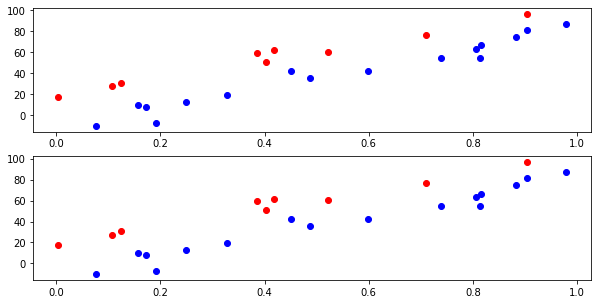

In [84]:
# make predictions
preds = model.predict(x_test)

fig, ax = plt.subplots(2, figsize=(10,5))

for i in range(len(x_test)):
  # plot real value
  ax[0].scatter(x_test[i][0], x_test[i][1], c='blue' if y_test[i] == 1 else 'red', label='Real')
  # plot predictions
  ax[1].scatter(x_test[i][0], x_test[i][1], c='blue' if preds[i] >= .5 else 'red', label='Predictions')
  

In [85]:
# draw line by obtaining weights

# get weights from model
weights = model.get_weights()

# has input shape of 2, which represent our weight vector
print(weights[0].shape)

# has output shape of 1, which will represent our b
print(weights[1].shape)

(2, 1)
(1,)


In [86]:
# these will be the weights we use to plot our graph
# weight vector
print(weights[0])

# bias
print(weights[1])

[[20.370584  ]
 [-0.21522017]]
[0.77193195]


$x_2 = (w_1 x_1 + b) / w_2 $

In [0]:
# create an array to represent the space of our data
d = np.linspace(0, 1)

pred_line = -((weights[0][0] * d) + weights[1]) / weights[0][1]

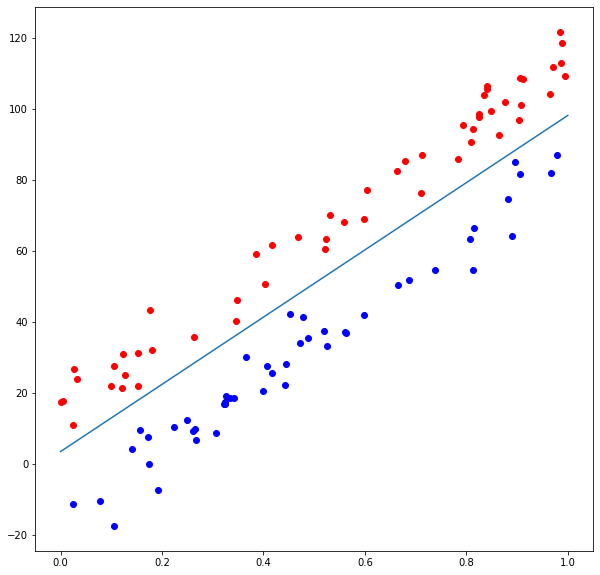

In [88]:
# plot line
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(d, pred_line)


for i in range(len(x_1)):
  # plot real value
  ax.scatter(x_1[i], x_2[i], c='blue' if y[i] == 1 else 'red', label='Real')

plt.show()

Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece?gi=5969b4744006

https://www.kaggle.com/emilyhorsman/basic-logistic-regression-with-numpy

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

# Logistic Regression Model

$ h(x) = \sigma(\Theta^T x) $

where $ \sigma(x) = \frac{1}{1+e^{-t}} $

Therefore the model hypothesis is 

$h(x) = \frac{1}{1 + e^{-\Theta^Tx}}$


### Computing Cost

$ J(\Theta) = -\frac{1}{m} \Sigma_{i=1}^m (y^i log(h(x^i)) + (1 - y^i) log(1-h(x^i))$

In [0]:
class Model:
  def __init__(self, input_dim=2, learning_rate=0.1, epochs=100):
    self.input_dim = input_dim
    # weights
    self.weights = np.zeros(input_dim)
    self.b = np.zeros(1)
    # hyperparameters
    self.learning_rate=learning_rate
    self.epochs=epochs

  def make_prediction(self, x):
    z = 0
    for i in range(input_dim):
      z += self.weights[i] * x[i]
    z += self.b
    a = self.sigmoid(z) 
    return a

  def loss(self, a, y):
    loss = (-y * math.log(a)) - ((1 - y) * math.log(1 - a))
  
  def loss_prime(self, a, y, xj):
    return np.dot((a - y), xj)

  def train(self, x_data, y_labels):
    # loop through all examples
    for k in range(len(y_labels)):

      # loop through each feature for each example
      for j in range(len(x_data[k])):

        # make prediction
        a = self.make_prediction(x_data[k])

        # update weights
        for i in range(len(weights)):
          binary_cross_entropy_loss = self.loss_prime(a, y_labels[k], x_data[k][j])
          self.weights[i] += self.learning_rate * binary_cross_entropy_loss
        
        # update b
        self.b += self.learning_rate * (a - y_labels[k])

        print(self.weights, self.b)

  
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

In [0]:
x_1, x_2, y = get_random_data(100,10,15,5,100)

# X = (x1, x2 ... xn)T
X = np.array([x_1, x_2]).T

In [0]:

my_model = Model()

In [140]:
my_model.train(X, y)

[-0.04854443 -0.04854443] [-0.05]
[-7.80698427 -7.80698427] [-0.14808647]
[-7.80698427 -7.80698427] [-0.14808647]
[-7.80698427 -7.80698427] [-0.14808647]
[-7.80698427 -7.80698427] [-0.14808647]
[-7.80698427 -7.80698427] [-0.14808647]
[-7.86229552 -7.86229552] [-0.24808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.14564556 -12.14564556] [-0.34808647]
[-12.16815537 -12.16815537] [-0.44808647]
[-12.52850258 -12.52850258] [-0.54808647]
[-12.60833854 -12.60833854] [-0.64808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.46413488 -19.46413488] [-0.74808647]
[-19.4641348

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp
